In [817]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

In [818]:
data = pd.read_csv('datasets/mall.csv')

data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


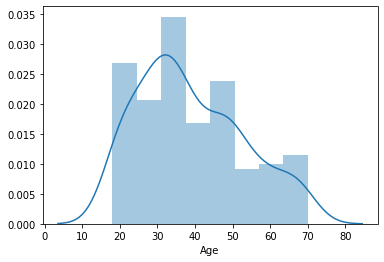

In [819]:
sns.distplot(data.Age)

In [820]:
data.drop(['Gender','Age','CustomerID'], axis =1, inplace=True)
data.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [821]:
data.isna().sum()

Annual_Income     0
Spending_Score    0
dtype: int64

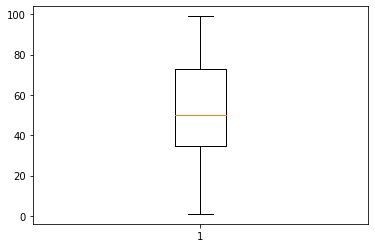

In [822]:
plt.boxplot(data['Spending_Score'])
plt.show();

In [823]:
data = data.sample(frac=1)

In [824]:
k_means = KMeans(n_clusters=2)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [825]:
k_means.labels_

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [826]:
centers = k_means.cluster_centers_
centers

array([[79.6       , 50.12727273],
       [37.28888889, 50.28888889]])

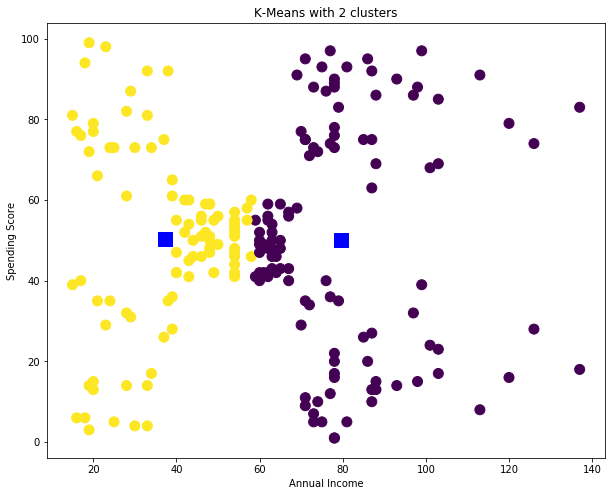

In [827]:
plt.figure(figsize=(10,8))

plt.scatter(data['Annual_Income'], data['Spending_Score'],
           c=k_means.labels_, s=100)

plt.scatter(centers[:,0],centers[:,1], color='blue', marker='s', s=200)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

In [828]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data, k_means.labels_)

print("score = ",score)

score =  0.29689691625030085


In [829]:
k_means = KMeans(n_clusters=5)

k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [830]:
k_means.labels_

array([3, 3, 0, 1, 1, 3, 1, 3, 4, 3, 2, 3, 1, 1, 0, 2, 0, 2, 1, 3, 2, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 4, 1, 1, 3, 0, 1, 2, 0, 3, 3, 0, 1, 1, 3,
       0, 3, 1, 4, 3, 1, 3, 1, 3, 4, 2, 1, 1, 4, 0, 3, 1, 3, 4, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 4, 0, 4, 0, 2, 0, 1, 3, 2, 1,
       1, 0, 4, 1, 0, 1, 1, 1, 1, 1, 3, 4, 1, 3, 1, 0, 1, 2, 1, 3, 2, 0,
       4, 4, 1, 0, 0, 4, 4, 2, 4, 1, 4, 4, 0, 3, 1, 1, 2, 1, 0, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 4, 0, 3, 3, 1, 1, 3, 1, 2, 0, 1, 3, 3, 1,
       1, 0, 4, 2, 0, 0, 4, 1, 1, 1, 3, 1, 0, 0, 2, 1, 1, 0, 0, 4, 1, 0,
       0, 3, 1, 1, 3, 2, 0, 0, 1, 4, 1, 1, 2, 1, 3, 1, 3, 0, 3, 3, 0, 1,
       3, 3], dtype=int32)

In [831]:
centers = k_means.cluster_centers_
centers

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

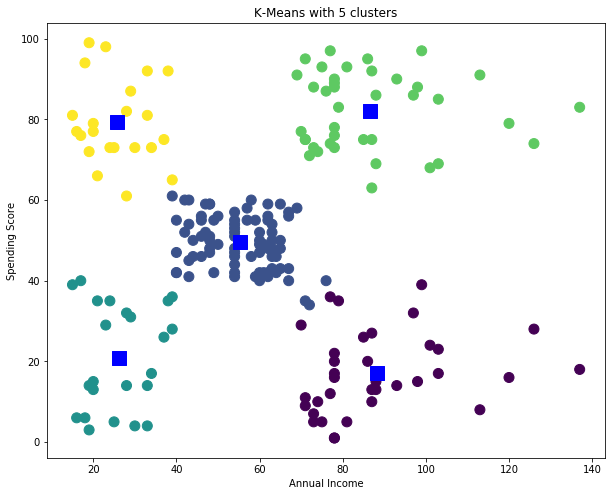

In [832]:
plt.figure(figsize=(10,8))

plt.scatter(data['Annual_Income'], data['Spending_Score'],
           c=k_means.labels_, s=100)

plt.scatter(centers[:,0],centers[:,1], color='blue', marker='s', s=200)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 5 clusters')

plt.show();

In [833]:
data = pd.read_csv('datasets/cars.csv')
data.head(10)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
5,23.0,8,350,125,3900,17,1980,US.
6,13.0,8,351,158,4363,13,1974,US.
7,14.0,8,440,215,4312,9,1971,US.
8,25.4,5,183,77,3530,20,1980,Europe.
9,37.7,4,89,62,2050,17,1982,Japan.


In [834]:
data.columns = data.columns.str.lstrip()
data.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [835]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
mpg            261 non-null float64
cylinders      261 non-null int64
cubicinches    261 non-null object
hp             261 non-null int64
weightlbs      261 non-null object
time-to-60     261 non-null int64
year           261 non-null int64
brand          261 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [836]:
index_to_drop = data[data['cubicinches'] == ' '].index
print('dropping indexes for cubicinches ... ', index_to_drop)
data.drop(index_to_drop , inplace=True)

dropping indexes for cubicinches ...  Int64Index([40, 180], dtype='int64')


In [837]:
index_to_drop_weight = data[data['weightlbs'] == ' '].index
print('dropping indexes for weightlbs ... ', index_to_drop_weight)
data.drop(index_to_drop_weight , inplace=True)

dropping indexes for weightlbs ...  Int64Index([14, 33, 172], dtype='int64')


In [838]:
data = data.sample(frac=1)

In [839]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 155 to 214
Data columns (total 8 columns):
mpg            256 non-null float64
cylinders      256 non-null int64
cubicinches    256 non-null object
hp             256 non-null int64
weightlbs      256 non-null object
time-to-60     256 non-null int64
year           256 non-null int64
brand          256 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 18.0+ KB


In [840]:
data['cubicinches'] = pd.to_numeric(data['cubicinches'], errors = 'coerce')
data['weightlbs'] = pd.to_numeric(data['weightlbs'], errors = 'coerce')

In [841]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 155 to 214
Data columns (total 8 columns):
mpg            256 non-null float64
cylinders      256 non-null int64
cubicinches    256 non-null int64
hp             256 non-null int64
weightlbs      256 non-null int64
time-to-60     256 non-null int64
year           256 non-null int64
brand          256 non-null object
dtypes: float64(1), int64(6), object(1)
memory usage: 18.0+ KB


In [842]:
data.dropna(inplace=True, axis=0)

In [843]:
data.shape

(256, 8)

In [844]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
data['brand'] = labelEncoder.fit_transform(data['brand'].astype(str))

data.sample(10)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
84,25.0,4,116,81,2220,17,1977,0
110,20.0,4,97,88,2279,19,1974,1
126,13.0,8,360,170,4654,13,1974,2
149,18.1,8,302,139,3205,11,1979,2
43,17.5,6,250,110,3520,16,1978,2
227,31.0,4,76,52,1649,17,1975,1
252,36.4,5,121,67,2950,20,1981,0
169,38.0,4,105,63,2125,15,1983,2
177,14.0,8,304,150,3672,12,1974,2
18,24.0,4,113,95,2278,16,1973,1


In [845]:
data_X = pd.DataFrame(data, columns=['mpg', 'cubicinches','cylinders','hp'])
label_y = data['brand']

Text(0, 0.5, 'Weight')

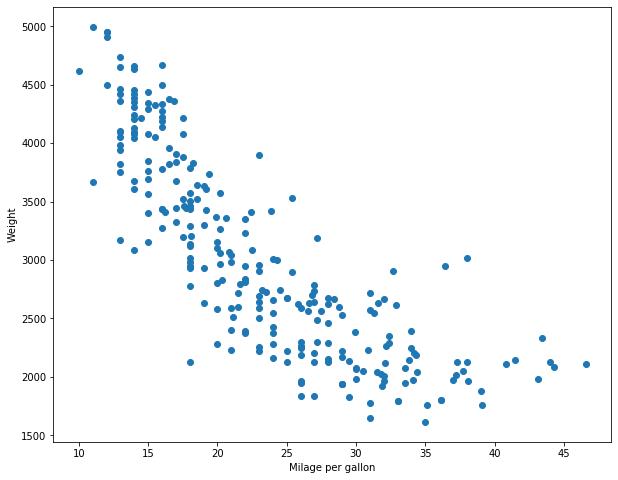

In [846]:
plt.figure(figsize=(10,8))

plt.scatter(data['mpg'], data['weightlbs'])

plt.xlabel("Milage per gallon")
plt.ylabel("Weight")

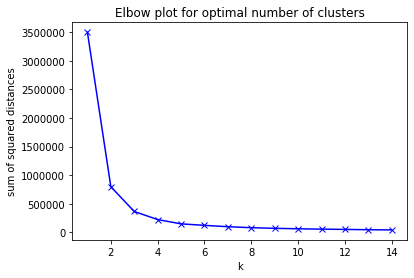

In [849]:
sum_of_squared_distances = []

K = range(1,15)

for k in K:
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(data_X)
    
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum of squared distances')
plt.title('Elbow plot for optimal number of clusters')
plt.show()

In [850]:
k_means = KMeans(n_clusters=3)
k_means = k_means.fit(data_X)

In [855]:
k_means.labels_

array([0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0,
       0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 0, 2, 1, 0,
       0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2,
       0, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 0, 1,
       0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0], dtype=int32)

In [851]:
from sklearn.metrics import silhouette_score

score = silhouette_score (data_X, k_means.labels_)
print("score =", score)

score = 0.6323149311159748


In [854]:
from sklearn.metrics import homogeneity_score
hmg_score = homogeneity_score(label_y, k_means.labels_)
    
print("Homogenity Score =", hmg_score)

Homogenity Score = 0.3155003627756417


In [857]:
from sklearn.metrics import v_measure_score

vm_score = v_measure_score(label_y, k_means.labels_)

print("V Measure Score = ", vm_score)

V Measure Score =  0.30033756140227647


In [860]:
from sklearn.metrics import completeness_score

comp_score = completeness_score(label_y, k_means.labels_)

print("Completeness_score = ", comp_score)

Completeness_score =  0.2865653627353229


In [861]:
from sklearn.metrics import adjusted_rand_score

adj_r_score = adjusted_rand_score(label_y, k_means.labels_)

print("Adjusted_rand Score = ", adj_r_score)

Adjusted_rand Score =  0.11281925794858025


In [863]:
from sklearn.metrics import adjusted_mutual_info_score

adj_mutual = adjusted_mutual_info_score(label_y, k_means.labels_)

print("Adjusted mutual Score = ", adj_mutual)

Adjusted mutual Score =  0.2945981842532959
